In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [4]:
# Paths to the data files
abundance_file_path = './data/species_abundance_filt.csv'
organism_subset_file_path = './data/organism_data_to_subset.csv'

# Load both files
# species_abundance_filt.csv: This file contains abundance data for different species, 
# used to filter and visualize abundance patterns based on environmental variables such as soil pH.
# The column "taxon" in this file corresponds to "Species of interest" in organism_data_to_subset.csv,
# allowing the two datasets to be merged for visualization.
df_abundance = pd.read_csv(abundance_file_path)

# organism_data_to_subset.csv: This file contains information on environmental preferences for various species,
# such as soil pH preference. The column "Species of interest" in this file aligns with "taxon" in
# species_abundance_filt.csv, enabling filtering and visualization based on specific environmental preferences.
df_to_subset = pd.read_csv(organism_subset_file_path)



# Check Data Sizes

In [17]:
print(df_abundance.shape)
print(df_to_subset.shape)
unique_species_count = df_to_subset['Species of interest'].nunique()
print(unique_species_count)

(66210, 24)
(4998, 31)
4998


Duplicates in subset of organisms, need to remove

In [13]:
# Check for duplicates in the 'Species of interest' column
duplicates = df_to_subset[df_to_subset.duplicated(subset='Species of interest', keep=False)]
duplicate_species_names = duplicates['Species of interest'].unique()

# Print the names of duplicate species
print(duplicate_species_names)

['Bacillus paramycoides' 'Bacillus sp. MM2020_4' 'Methanosarcina sp. Ant1'
 'Clostridium sp. AM58-1XD' 'Clostridium sp. MCC353'
 'Bacillus sp. USDA818B3_A' 'Bacillus sp. CMF21' 'Bacillus sp. S3'
 'Bacillus sp. FJAT-49736' 'Rhodotorula toruloides'
 'Methanosarcina sp. 2.H.T.1A.6' 'Bacillus sp. FJAT-27264'
 'Clostridium pasteurianum' 'Clostridium sp. USBA 49'
 'Clostridium tarantellae' 'Bacillus sp. AFS096315'
 'Bacillus sp. FJAT-42376' 'Clostridium fallax' 'Bacillus ectoiniformans'
 'Clostridium sp. Marseille-P2415' 'Bacillus solitudinis'
 'Clostridium lacusfryxellense' 'Nitrosomonas sp. Nm34'
 'Bacillus amyloliquefaciens' 'Bacillus sp. FJAT-26390'
 'Bacillus tianshenii' 'Bacillus sp. NTK074B' 'Bacillus safensis'
 'Bacillus sp. Soil768D1' 'Clostridium botulinum' 'Nitrosomonas mobilis'
 'Bacillus sp. REN3' 'Clostridium sp. C2-6-12' 'Bacillus sp. FJAT-27225'
 'Bacillus sp. B15-48' 'Bacillus subtilis' 'Bacillus bingmayongensis'
 'Bacillus sp. HMF5848' 'Clostridium sp. AF27-2AA'
 'Clostridi

# Remove Duplicates

In [14]:
# Remove Duplicate Species
df_to_subset = df_to_subset.drop_duplicates(subset='Species of interest')
df_to_subset.shape

(4998, 31)

# Merge Data

In [15]:
merged_data = pd.merge(
    df_to_subset, df_abundance, 
    left_on='Species of interest', right_on='name', 
    how='inner'
)


merged_data.shape


(66210, 55)

In [16]:
print(merged_data.columns)
top_species = merged_data.groupby('Species of interest').size().nlargest(10).reset_index(name='count')
top_species

Index(['Unnamed: 0', 'GEM ID', 'Kingdom', 'Genus', 'Species.strain',
       'Citation', 'Source', 'Filepath', 'Match criteria',
       'Species of interest', 'Functional in COMETS?', 'taxonomy_id_x',
       'lineage_x', 'db_name_x', 'cultivatedCrops', 'deciduousForest',
       'dwarfScrub', 'emergentHerbaceousWetlands', 'evergreenForest',
       'grasslandHerbaceous', 'mixedForest', 'pastureHay', 'sedgeHerbaceous',
       'shrubScrub', 'woodyWetlands', 'source_x', 'pH_preference',
       'temperature_preference', 'genome_link', 'GEM_ID', 'match_by', 'name',
       'taxonomy_id_y', 'percentage', 'lineage_y', 'source_y', 'is_MAG',
       'taxid_lineage', 'genomicsSampleID', 'd15N', 'organicd13C',
       'nitrogenPercent', 'organicCPercent', 'soilTemp', 'soilMoisture',
       'soilInWaterpH', 'soilInCaClpH', 'latitude', 'longitude', 'elevation',
       'sampleTiming', 'nlcdClass', 'db_name_y', 'taxon', 'n_samples'],
      dtype='object')


,Species of interest,count
0,Deltaproteobacteria bacterium,1357
1,Verrucomicrobiaceae bacterium,1355
2,Hyphomicrobiaceae bacterium,1345
3,Methylobacterium oryzihabitans,1326
4,Nonomuraea sp. NEAU-A123,1321
5,Mycobacterium sp. 1245111.1,1310
6,uncultured Telmatospirillum sp.,1308
7,Bordetella genomosp. 9,1303
8,Chloroflexi bacterium OHK40,1302
9,Ramlibacter ginsenosidimutans,1300


In [18]:
species_name = ["Deltaproteobacteria bacterium", "Verrucomicrobiaceae bacterium", "Hyphomicrobiaceae bacterium", "Methylobacterium oryzihabitans", "Nonomuraea sp. NEAU-A123", "Mycobacterium sp. 1245111.1", "uncultured Telmatospirillum sp."]

# Filter for the target species
target_species = merged_data[merged_data['Species of interest'].isin(species_name)]



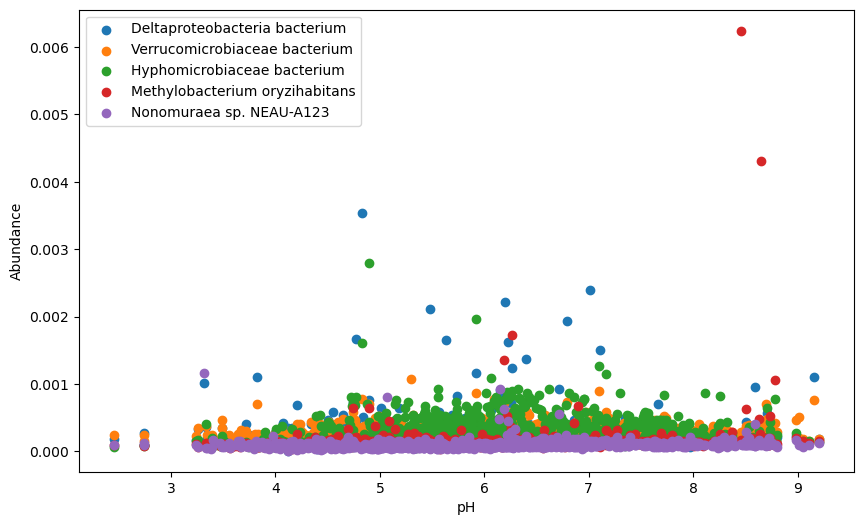

<Figure size 640x480 with 0 Axes>

In [20]:
# Plot the abundance of the top species
plt.figure(figsize=(10, 6))
for species in species_name:
    species_data = target_species[target_species['Species of interest'] == species]
    plt.scatter(species_data['soilInWaterpH'], species_data['percentage'], label=species)

plt.xlabel('pH')
plt.ylabel('Abundance')
plt.legend()
plt.show()
plt.savefig('abundance_vs_ph.png')

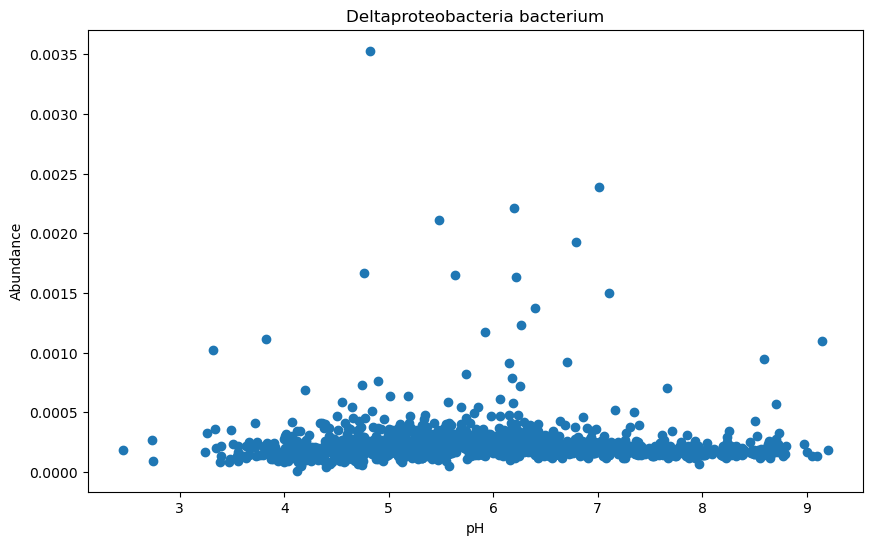

<Figure size 640x480 with 0 Axes>

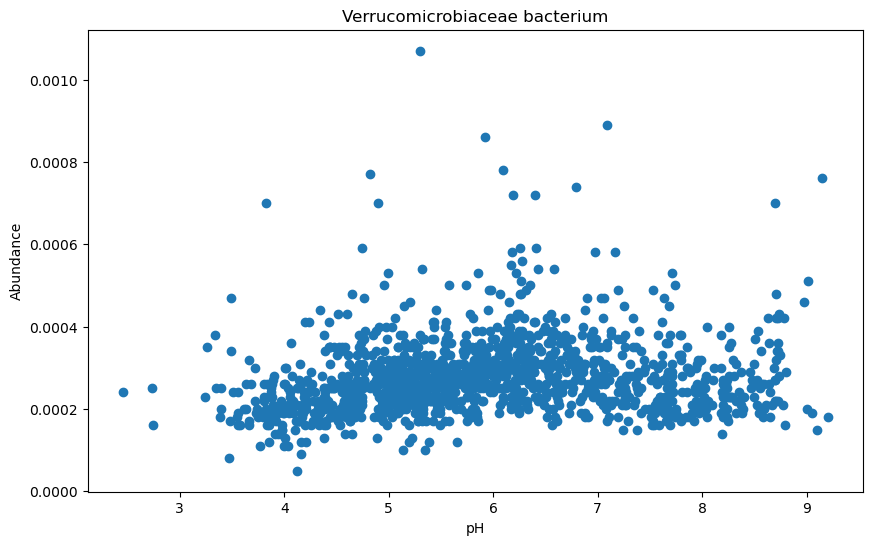

<Figure size 640x480 with 0 Axes>

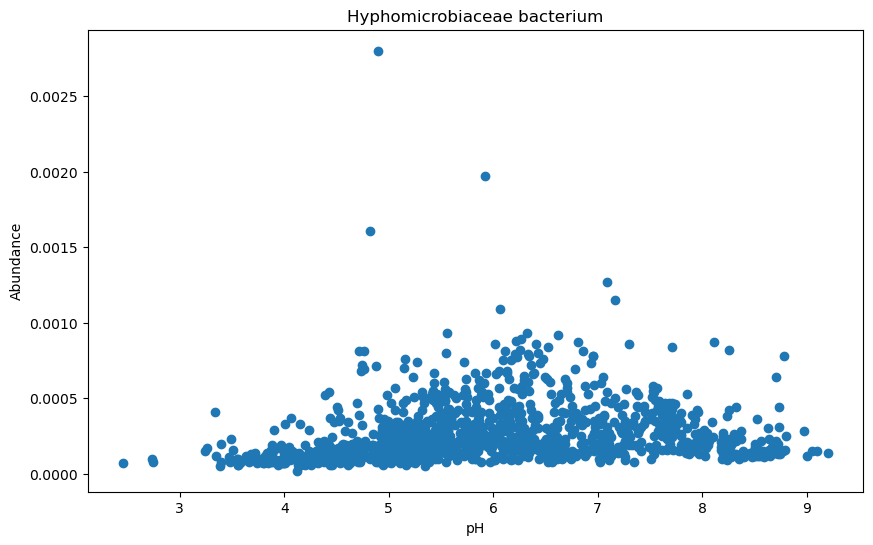

<Figure size 640x480 with 0 Axes>

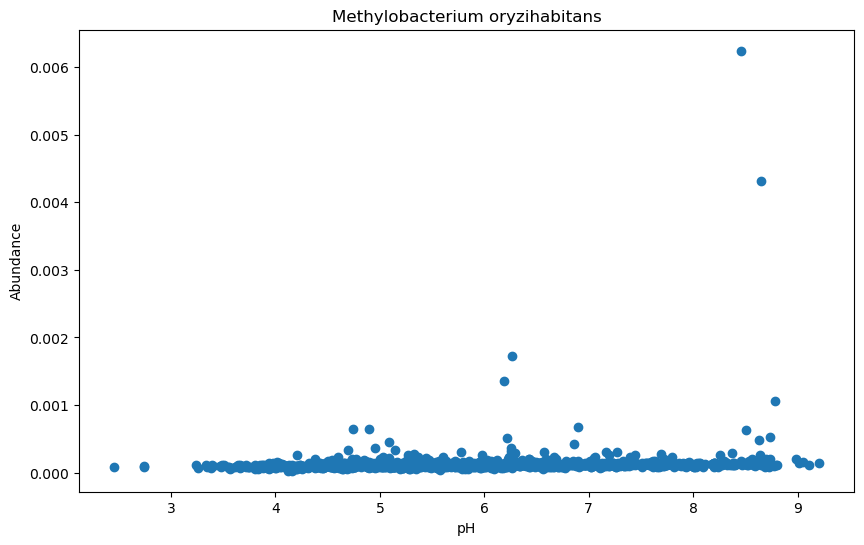

<Figure size 640x480 with 0 Axes>

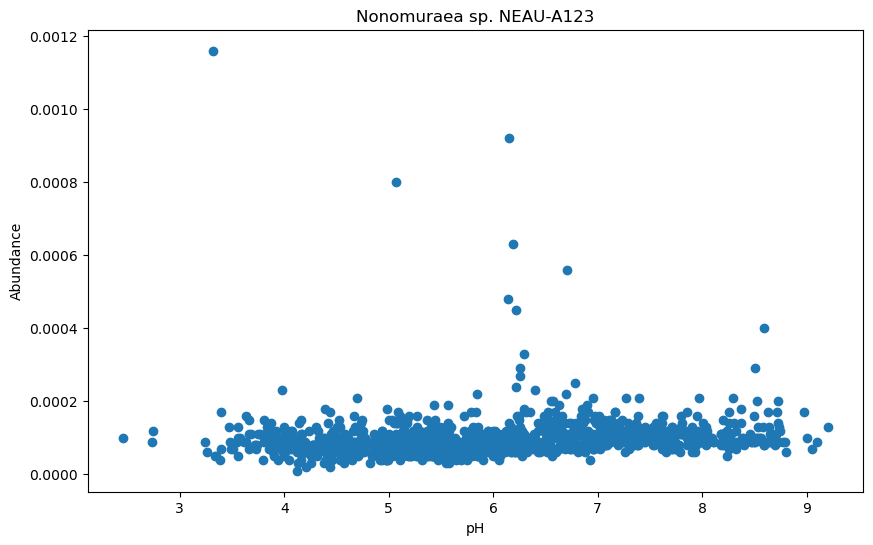

<Figure size 640x480 with 0 Axes>

In [21]:
# Plot individually for each species
for species in species_name:
    species_data = target_species[target_species['Species of interest'] == species]
    plt.figure(figsize=(10, 6))
    plt.scatter(species_data['soilInWaterpH'], species_data['percentage'])
    plt.xlabel('pH')
    plt.ylabel('Abundance')
    plt.title(species)
    plt.show()
    plt.savefig(f'abundance_vs_ph_{species}.png')

    